## Package in use

In [1]:
import csv
import pandas as pd
import tensorflow as tf
from os import path, getcwd, chdir
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as ku 
import numpy as np 
import random
import scipy
from sklearn import preprocessing
import shap
import sklearn
import keras
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## Readin Data

In [2]:
data=pd.read_csv(r'C:\Users\mao28\Desktop\ba775 group project temp\master_training.csv',header=0,low_memory=False)

In [3]:
data

Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0          2  Historical     1737127         0          0             D   
1          3  Historical     3255963         0          0             D   
2          4  Historical      612701         0          0             D   
3          6  Historical      115883         1          1             D   
4          7  Historical      863939         1          1             D   
5          8  Historical      214948         0          0             D   
6          9  Historical      484059         0          0             D   
7         10  Historical      146401         0          0             D   
8         11  Historical      110568         0          0             D   
9         12  Historical      764270         0          0             D   
10        13  Historical     1597828         0          0             D   
11        14  Historical      178736         0          0             D   
12        15  Historical      525904         0          0             D   
13        16  Historical     3016759         0          0             D   
14        17  Historical      169222         0          0             D   
15        18  Historical     3071053         0          0             D   
16        19  Historical      110699         1          1             D   
17        20  Historical      115159         0          0             D   
18        21  Historical      143125         0          0             D   
19        22  Historical      144296         0          0             D   
20        23  Historical      159588         0          0             D   
21        24  Historical      178701         0          0             D   
22        25  Historical      210839         1          1             D   
23        26  Historical      210920         0          0             D   
24        27  Historical     2387463         1          1             D   
25        28  Historical     2398402         1          1             D   
26        29  Historical      244942         1          1             D   
27        30  Historical      247825         0          0             D   
28        31  Historical      251957         0          0             D   
29        32  Historical     3133247         0          0             D   
...      ...         ...         ...       ...        ...           ...   
75966  85072  Historical      892845         0          0             S   
75967  85073  Historical      607809         0          0             S   
75968  85074  Historical      865598         0          0             S   
75969  85075  Historical      131704         0          0             S   
75970  85076  Historical      543832         0          0             S   
75971  85077  Historical      863345         0          0             S   
75972  85078  Historical      705460         0          0             S   
75973  85079  Historical      802560         1          1             S   
75974  85080  Historical      630481         0          0             S   
75975  85081  Historical      275901         0          0             S   
75976  85083  Historical      672225         0          0             S   
75977  85084  Historical      601745         0          0             S   
75978  85085  Historical      650393         0          0             S   
75979  85086  Historical      676698         0          0             S   
75980  85087  Historical      881719         0          0             S   
75981  85089  Historical      524948         0          0             S   
75982  85091  Historical      132327         0          0             S   
75983  85093  Historical      617572         0          0             S   
75984  85094  Historical      105697         0          0             S   
75985  85095  Historical      140589         0          0             S   
75986  85096  Historical      140391         0          0             S   
75987  85098  Historical      52

## Cleaning and sorting

In [4]:
data=data.replace('D',1).replace('S',2)

In [5]:
data00=data.fillna(0)

## Feature engineering and distribution

In [7]:
parameter = []
trans_chan = []
full_list00=[]
#append value to each list
for i in range(len(data00['SoldFlag'])):
    #fetch eachrow
    idindex=data00['SKU_number'][i]
    subset=data00.loc[data00['SKU_number']==idindex]
    full_list00.append(((subset.values.tolist())[0][3:]))
    
print('done')    

done


In [9]:
test_portion=0.1
random.shuffle(full_list00)
parameter = []
trans_chan = []
for x in range(len(full_list00)):
    parameter.append(full_list00[x][2:])
    trans_chan.append(full_list00[x][0])
split=int(test_portion * len(full_list00))
parameter=np.asarray(parameter)
trans_chan=np.asarray(trans_chan)
test_sequences = parameter[0:split]
training_sequences = parameter[split:len(full_list00)]
test_labels = trans_chan[0:split]
training_labels = trans_chan[split:len(full_list00)]
print(len(training_sequences),len(test_sequences))
print('done') 

68397 7599
done


In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(training_sequences)
x_test = min_max_scaler.fit_transform(test_sequences)
#training_padded = np.array(training_sequences)
y_train = np.array(training_labels)
#testing_padded = np.array(test_sequences)
y_test = np.array(test_labels)

## Construct Model

In [11]:
input_dim=len(test_sequences[1])
batch_size=len(training_sequences)/100
print(batch_size)
model00 = tf.keras.Sequential([
    Dense(18, kernel_initializer = 'uniform',activation='relu',input_dim=input_dim),
    #Dropout(0.3),
    Dense(9, activation='relu'),
    #Dropout(0.3),
    #Dense(100, activation='relu'),
    #Dropout(0.3),
    #Dense(25, activation='relu'),
   # Dropout(0.2),
    #Dense(5, activation='relu'),
    #Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model00.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model00.summary()
num_epochs = 50
#print(training_sequences[2])
#print(training_padded[2])
history00 = model00.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test),batch_size=int(batch_size))

print("Training Complete")

683.97
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
Train on 68397 samples, validate on 7599 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
68397/68397 [==============================] - ETA: 34s - loss: 0.6857 - acc: 0.68 - ETA: 0s - loss: 0.6377 - acc: 0.8197 - ETA: 0s - loss: 0.5898 - acc: 0.826 - ETA: 0s - loss: 0.5510 - acc: 0.826 - 1s 9us/sample - loss:

68397/68397 [==============================] - ETA: 0s - loss: 0.4280 - acc: 0.815 - ETA: 0s - loss: 0.4072 - acc: 0.831 - ETA: 0s - loss: 0.4015 - acc: 0.833 - ETA: 0s - loss: 0.4003 - acc: 0.833 - 0s 3us/sample - loss: 0.4004 - acc: 0.8338 - val_loss: 0.4606 - val_acc: 0.7652
Epoch 26/50
68397/68397 [==============================] - ETA: 0s - loss: 0.4179 - acc: 0.834 - ETA: 0s - loss: 0.4023 - acc: 0.833 - ETA: 0s - loss: 0.4006 - acc: 0.834 - 0s 2us/sample - loss: 0.4003 - acc: 0.8339 - val_loss: 0.4498 - val_acc: 0.7758
Epoch 27/50
68397/68397 [==============================] - ETA: 0s - loss: 0.3941 - acc: 0.830 - ETA: 0s - loss: 0.4003 - acc: 0.834 - ETA: 0s - loss: 0.3995 - acc: 0.834 - 0s 2us/sample - loss: 0.4002 - acc: 0.8340 - val_loss: 0.4602 - val_acc: 0.7665
Epoch 28/50
68397/68397 [==============================] - ETA: 0s - loss: 0.4090 - acc: 0.818 - ETA: 0s - loss: 0.4002 - acc: 0.833 - ETA: 0s - loss: 0.4007 - acc: 0.833 - ETA: 0s - loss: 0.4001 - acc: 0.833 - 0s 3

## Model analysis

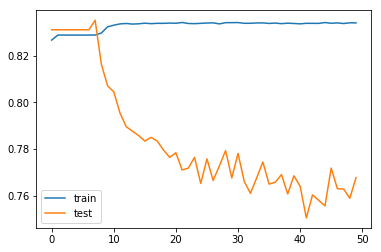

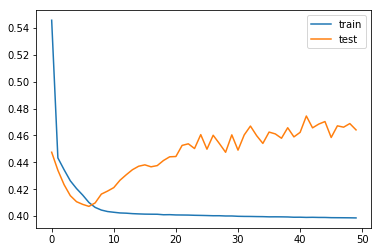

In [12]:
from matplotlib import pyplot

pyplot.plot(history00.history['acc'], label='train')
pyplot.plot(history00.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(history00.history['loss'], label='train')
pyplot.plot(history00.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Importance analysis

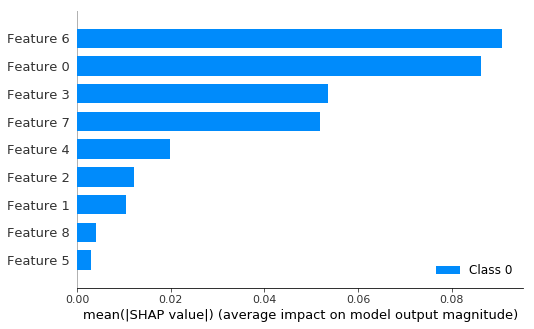

In [13]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model00, background)

shap_values = e.shap_values(x_test)

shap.summary_plot(shap_values, x_train,plot_size='auto',max_display=499)

## Prediction based on Model

follow the same data preprocessing and feature engineer processes to insure the same prediction set has same date distribution

In [14]:
data_pred=pd.read_csv(r'C:\Users\mao28\Desktop\ba775 group project temp\master test.csv',header=0)

In [15]:
data_pred=data_pred.replace('D',1).replace('S',2)

In [16]:
data_pred

Order File_Type  SKU_number  SoldFlag  SoldCount  MarketingType  \
0        85107    Active      869734       NaN        NaN              2   
1        85108    Active     3741319       NaN        NaN              2   
2        85109    Active     3517789       NaN        NaN              2   
3        85110    Active     1455936       NaN        NaN              2   
4        85111    Active     2921480       NaN        NaN              2   
5        85112    Active      862455       NaN        NaN              2   
6        85113    Active     2238268       NaN        NaN              2   
7        85114    Active     2348209       NaN        NaN              2   
8        85115    Active      910476       NaN        NaN              2   
9        85116    Active     1547664       NaN        NaN              2   
10       85117    Active     2293062       NaN        NaN              2   
11       85118    Active      661527       NaN        NaN              2   
12       85119    Active      874950       NaN        NaN              2   
13       85120    Active     2974380       NaN        NaN              2   
14       85121    Active     2919019       NaN        NaN              2   
15       85122    Active     2252131       NaN        NaN              2   
16       85123    Active      874396       NaN        NaN              2   
17       85124    Active      428587       NaN        NaN              2   
18       85125    Active      872854       NaN        NaN              2   
19       85126    Active     2281309       NaN        NaN              2   
20       85127    Active      874934       NaN        NaN              2   
21       85128    Active     3644308       NaN        NaN              2   
22       85129    Active     2919325       NaN        NaN              2   
23       85130    Active      699417       NaN        NaN              2   
24       85131    Active      887073       NaN        NaN              2   
25       85132    Active     1829217       NaN        NaN              2   
26       85133    Active      875189       NaN        NaN              2   
27       85134    Active      876932       NaN        NaN              2   
28       85135    Active     3951293       NaN        NaN              2   
29       85136    Active      887007       NaN        NaN              2   
...        ...       ...         ...       ...        ...            ...   
122891  207998    Active     1556695       NaN        NaN              2   
122892  207999    Active      177923       NaN        NaN              1   
122893  208000    Active      524948       NaN        NaN              2   
122894  208001    Active     1557959       NaN        NaN              2   
122895  208002    Active      132327       NaN        NaN              2   
122896  208003    Active     1703720       NaN        NaN              2   
122897  208004    Active      750629       NaN        NaN              1   
122898  208005    Active      617572       NaN        NaN              2   
122899  208006    Active     3604374       NaN        NaN              1   
122900  208007    Active     2347080       NaN        NaN              1   
122901  208008    Active      524944       NaN        NaN              1   
122902  208009    Active      105697       NaN        NaN              2   
122903  208010    Active      140589       NaN        NaN              2   
122904  208011    Active      140391       NaN        NaN              2   
122905  208012    Active     1497601       NaN        NaN              2   
122906  208013    Active      524940       NaN        NaN              2   
122907  208014    Active      524941       NaN        NaN              2   
122908  208015    Active      327486       NaN        NaN              2   
122909  208016    Active      775022       NaN        NaN              1   
122910  208017    Active      128752       NaN        NaN              1   
122911  208018    Active     2265700       NaN        NaN

In [17]:
data_pred00=data_pred.fillna(0)

In [18]:
parameter = []
trans_chan = []
full_list00_preb=[]
#append value to each list
for i in range(len(data_pred00['SoldFlag'])):
    #fetch eachrow
    idindex=data_pred00['SKU_number'][i]
    subset=data_pred00.loc[data_pred00['SKU_number']==idindex]
    full_list00_preb.append(((subset.values.tolist())[0][5:]))
predict_param=np.array(full_list00_preb)
predict_param_intermedia=predict_param
    
print('done')  

done


In [19]:
parameter = []
trans_chan = []
full_list=[]
id_list=[]
#append value to each list
for i in range(len(data_pred00['SoldFlag'])):
    #fetch eachrow
    idindex=data_pred00['SKU_number'][i]
    subset=data_pred00.loc[data_pred00['SKU_number']==idindex]
    id_list.append(idindex)
    full_list.append(((subset.values.tolist())[0])[5:])
predict_param=np.array(full_list)

In [20]:
full_list00_preb

[[2, 9, 1, 1251478.325, 92.82, 2018, 49, 11.46, 69.08],
 [2, 4, 1, 2407071.0, 49.0, 2016, 0, 0.0, 49.0],
 [2, 3, 1, 6890734.0, 44.95, 2016, 0, 0.0, 0.0],
 [2, 8, 1, 91562.33375, 219.0, 2014, 44, 13.71, 59.81],
 [2, 5, 1, 6922798.0, 83.95, 2016, 0, 0.0, 79.8],
 [2, 3, 1, 6576754.0, 97.25, 2017, 0, 0.0, 85.95],
 [2, 3, 1, 485200.4925, 26.07, 2012, 32, 21.97, 21.87],
 [2, 5, 1, 3316372.095, 10.25, 2003, 16, 33.0, 111.46],
 [2, 7, 1, 2758356.0330000003, 125.17, 2008, 23, 4.0, 72.63],
 [2, 2, 1, 1469890.38, 48.95, 2012, 4, 19.59, 15.0],
 [2, 2, 1, 238646.4525, 0.0, 2015, 0, 0.0, 75.73],
 [2, 2, 1, 210191.0088, 96.73, 2013, 19, 66.77, 91.73],
 [2, 3, 1, 396875.4188, 38.99, 2014, 16, 4.0, 38.98],
 [2, 5, 1, 200768.1088, 69.95, 2015, 4, 62.99, 69.95],
 [2, 3, 1, 8512852.308, 120.0, 2014, 0, 0.0, 0.0],
 [2, 10, 1, 4358572.305, 155.09, 2010, 39, 97.76, 153.24],
 [2, 6, 1, 526752.3038, 21.12, 2014, 25, 8.85, 16.75],
 [2, 4, 1, 626964.28, 201.88, 2012, 26, 23.94, 414.68],
 [2, 3, 1, 412033.695, 24.46, 2012, 14, 18.43, 22.29],
 [2, 2, 1, 870887.29, 0.0, 2014, 0, 0.0, 125.48],
 [2, 4, 1, 4126259.4039999996, 158.98, 2012, 9, 32.67, 140.53],
 [2, 4, 1, 17384454.0, 95.95, 2017, 0, 0.0, 95.95],
 [2, 4, 1, 2193452.0, 151.5, 2016, 6, 121.88, 0.0],
 [2, 4, 1, 955713.49, 41.26, 2013, 14, 23.99, 28.44],
 [2, 3, 1, 1648315.0690000001, 3.4, 2014, 14, 6.74, 3.6],
 [2, 6, 1, 74726.765, 44.79, 2015, 21, 27.99, 33.99],
 [2, 13, 1, 521136.5113, 150.0, 2011, 44, 58.55, 141.89],
 [2, 2, 1, 553250.44, 100.0, 2014, 17, 99.14, 95.06],
 [2, 2, 1, 259735.4, 0.0, 2015, 10, 15.49, 15.5],
 [2, 7, 1, 241735.0813, 24.02, 2014, 14, 23.33, 21.5],
 [2, 14, 1, 370883.7763, 0.0, 2014, 21, 36.88, 436.95],
 [2, 8, 1, 59893.0, 78.33, 2016, 10, 76.66, 73.79],
 [2, 6, 1, 6845561.0, 120.0, 2016, 0, 0.0, 120.0],
 [2, 2, 1, 1426156.4, 79.95, 2015, 37, 67.79, 60.89],
 [2, 3, 1, 126263.6713, 230.0, 2011, 30, 81.79, 183.35],
 [2, 8, 1, 367127.9688, 54.96, 2015, 6, 63.3, 49.79],
 [2, 3, 1, 66814.09625, 143.2, 2015, 19, 101.49, 121.49],
 [2, 2, 1, 159265.25, 218.47, 2013, 22, 63.67, 190.82],
 [2, 5, 1, 556542.965, 102.27, 2012, 22, 46.74, 50.98],
 [2, 7, 1, 409119.5025, 115.2, 2014, 20, 36.71, 102.4],
 [2, 1, 0, 1255754.131, 60.0, 2010, 12, 55.81, 45.14],
 [2, 2, 1, 449483.3488, 106.66, 2013, 6, 101.8, 77.34],
 [2, 5, 1, 1006322.5809999999, 138.23, 2005, 12, 51.77, 92.65],
 [2, 5, 1, 18169.46, 155.95, 2015, 19, 74.32, 99.75],
 [2, 6, 1, 694061.5113, 32.99, 2012, 5, 33.59, 30.98],
 [2, 6, 1, 593194.63, 0.0, 2015, 13, 93.77, 87.99],
 [2, 2, 1, 544923.45, 210.79, 2000, 25, 43.78, 494.99],
 [2, 2, 1, 2750145.9060000004, 69.99, 2013, 17, 42.55, 43.0],
 [2, 2, 1, 1746439.519, 93.97, 2010, 15, 50.21, 93.97],
 [2, 5, 1, 46986.20375, 64.95, 2013, 41, 26.84, 58.67],
 [2, 3, 1, 726499.1613, 108.03, 2013, 15, 28.45, 104.62],
 [2, 6, 1, 155633.965, 123.0, 2013, 41, 42.18, 92.69],
 [2, 9, 1, 188763.5988, 44.59, 2015, 8, 39.98, 44.98],
 [2, 0, 0, 82750.0, 97.95, 2017, 0, 0.0, 77.78],
 [2, 2, 1, 2259367.4, 59.95, 2011, 12, 29.98, 59.95],
 [2, 3, 1, 1177243.321, 66.8, 2010, 14, 23.64, 38.96],
 [2, 3, 1, 1304699.496, 69.95, 2010, 26, 28.98, 43.97],
 [2, 5, 1, 548913.9238, 72.96, 2015, 10, 56.98, 48.74],
 [2, 1, 0, 104661.2563, 25.95, 2005, 43, 6.92, 13.72],
 [2, 3, 1, 1894679.3380000002, 45.0, 2010, 13, 47.43, 146.02],
 [2, 2, 1, 175490.3475, 39.99, 2007, 13, 16.73, 27.64],
 [2, 2, 1, 1767271.446, 84.99, 2012, 13, 23.97, 47.86],
 [2, 3, 1, 2134745.795, 70.0, 2013, 11, 45.49, 33.99],
 [2, 4, 1, 1132970.623, 22.96, 2009, 14, 28.05, 21.99],
 [2, 2, 1, 2227218.22, 20.62, 2010, 21, 32.96, 20.18],
 [2, 2, 1, 1406061.124, 315.99, 2005, 20, 33.83, 104.97],
 [2, 1, 0, 2732019.0560000003, 82.33, 2005, 15, 4.34, 62.31],
 [2, 2, 1, 315924.5863, 64.6, 2014, 33, 22.94, 49.92],
 [2, 3, 1, 588991.3925, 103.25, 2009, 24, 48.94, 76.13],
 [2, 3, 1, 1899802.065, 99.0, 2010, 13, 23.99, 74.11],
 [2, 2, 1, 3043878.9760000003, 12.99, 1992, 22, 4.0, 61.79],
 [2, 1, 0, 4202044.55, 529.0, 2007, 25, 291.99, 394.84],
 [2, 3, 1, 928

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
predict_param_norm = min_max_scaler.fit_transform(predict_param)
predict_param_intermedia = min_max_scaler.fit_transform(predict_param_intermedia)

## make prediction by fitting X value into Model

In [ ]:
history_predict=model00.predict(predict_param_norm)

In [ ]:
history_predict

In [ ]:
len(history_predict)

## Covert the Numpy array type prediction result to Data frame

In [ ]:
id_list=np.array(id_list)
id_list=np.reshape(id_list,(len(history_predict), 1))
final_output = np.stack((id_list, history_predict), axis=1)
final_output=np.reshape(final_output,(len(history_predict), 2))
df_final_output_inter = pd.DataFrame (final_output)


In [ ]:
df_final_output_inter

## Export the data to csv

In [58]:
df_final_output_inter.to_excel (r'C:\Users\mao28\Desktop\ba775 group project temp\final_output00pred_inter.xlsx', index = False, header=True)